# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | khategaon
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | terbanggi besar
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | tocopilla
Processing Record 9 of Set 1 | tofol
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | puerto aysen
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | bardai
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | borujen
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | davlekanovo
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | margare

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-2.88,92,100,5.98,RU,1732469868
1,khategaon,22.6000,76.9167,17.40,47,9,2.09,IN,1732469869
2,albany,42.6001,-73.9662,6.99,60,8,0.89,US,1732469728
3,adamstown,-25.0660,-130.1015,22.16,66,53,6.55,PN,1732469872
4,terbanggi besar,-4.8667,105.2333,25.21,91,100,1.24,ID,1732469873


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-2.88,92,100,5.98,RU,1732469868
1,khategaon,22.6000,76.9167,17.40,47,9,2.09,IN,1732469869
2,albany,42.6001,-73.9662,6.99,60,8,0.89,US,1732469728
3,adamstown,-25.0660,-130.1015,22.16,66,53,6.55,PN,1732469872
4,terbanggi besar,-4.8667,105.2333,25.21,91,100,1.24,ID,1732469873


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

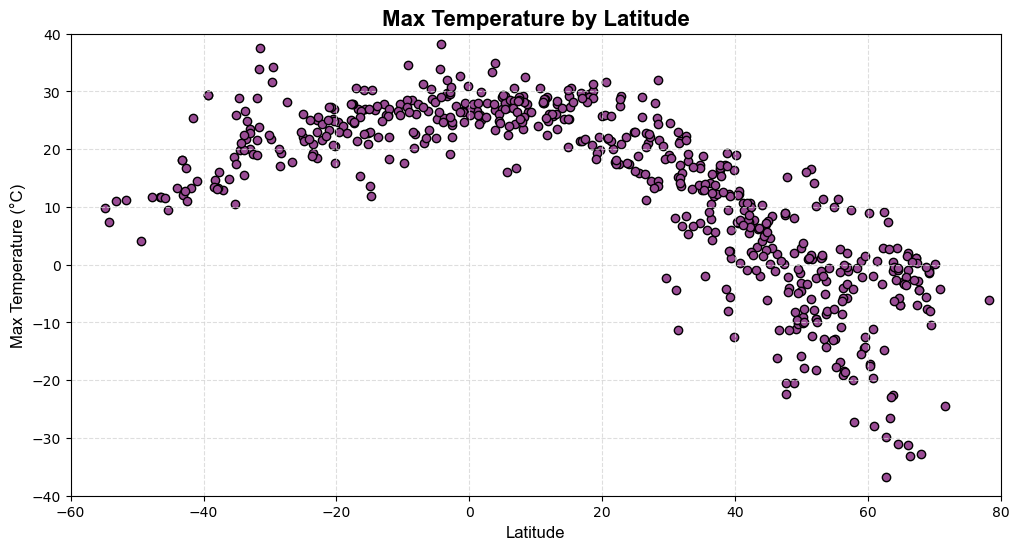

In [91]:
# Create DataFrame 2 for Lat and Max Temp
df2 = city_data_df[['Lat','Max Temp']]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df2["Lat"], df2["Max Temp"], color="#9A4C95", edgecolor="black")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontfamily="Arial", fontsize=12)
plt.title("Max Temperature by Latitude", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(-60, 80)
plt.ylim(-40, 40)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

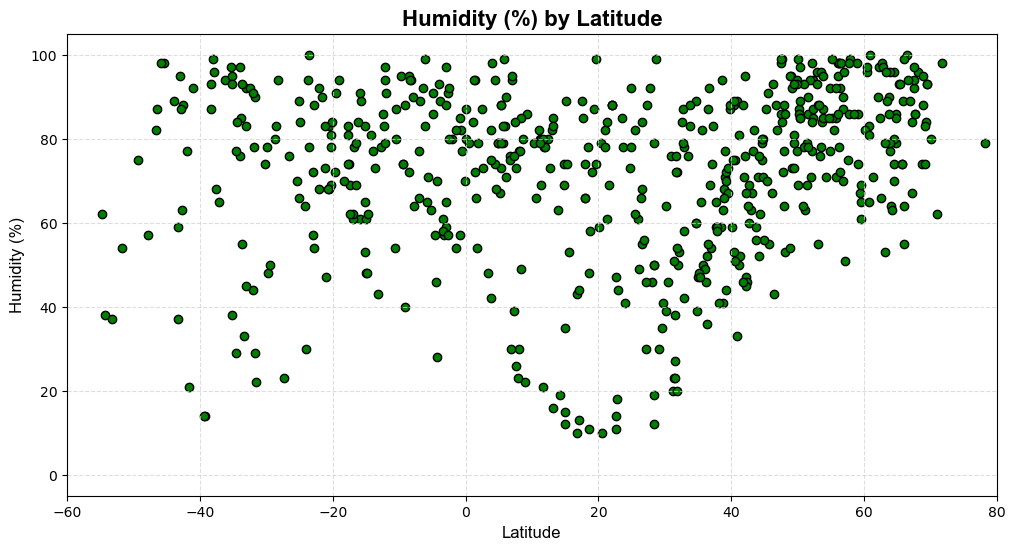

In [104]:
# Create DataFrame 3 for Lat and Humidity
df3 = city_data_df[['Lat','Humidity']]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df3["Lat"], df3["Humidity"], color="green", edgecolor="black")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity (%)", fontfamily="Arial", fontsize=12)
plt.title("Humidity (%) by Latitude", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(-60, 80)
plt.ylim(-5, 105)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

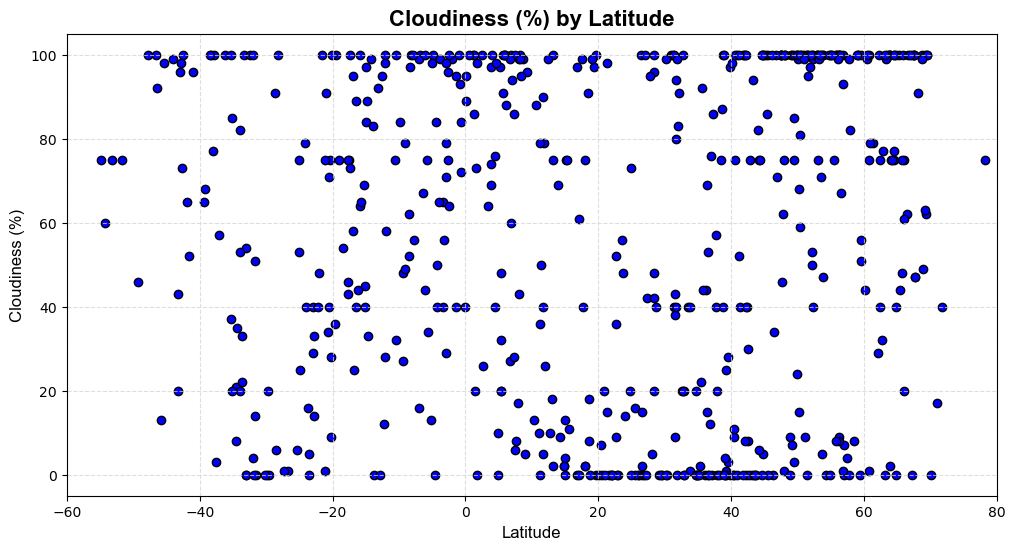

In [106]:
# Create DataFrame 4 for Lat and Humidity
df4 = city_data_df[['Lat','Cloudiness']]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df4["Lat"], df4["Cloudiness"], color="blue", edgecolor="black")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness (%)", fontfamily="Arial", fontsize=12)
plt.title("Cloudiness (%) by Latitude", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(-60, 80)
plt.ylim(-5, 105)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

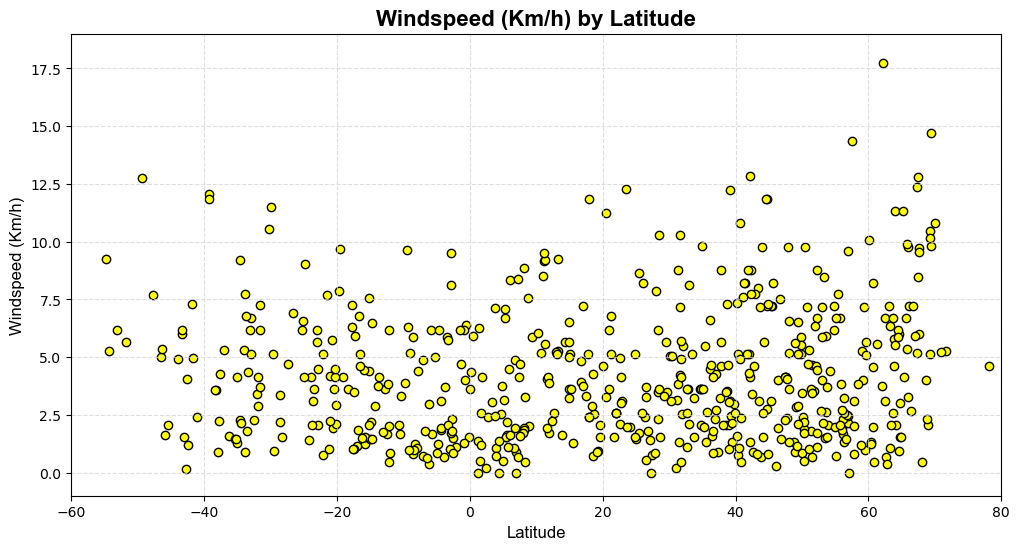

In [115]:
# Create DataFrame 4 for Lat and Humidity
df5 = city_data_df[['Lat','Wind Speed']]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df5["Lat"], df5["Wind Speed"], color="yellow", edgecolor="black")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Windspeed (Km/h)", fontfamily="Arial", fontsize=12)
plt.title("Windspeed (Km/h) by Latitude", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(-60, 80)
plt.ylim(-1, 19)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plot
def linear_reg(x_values, y_values, title, text_coords):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_values = x_values * slope + intercept
    lin_eq = "y = " + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    
    # Plot the regression
    plt.scatter(x_values, y_values, color="magenta", edgecolor="black", linewidth=1)
    plt.plot(x_values, reg_values, color="black",)
    plt.annotate(lin_eq, text_coords, color="black", fontsize=12)

    # Labels
    plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
    plt.ylabel(title, fontfamily="Arial", fontsize=12)
    plt.title(f"Latitide vs. {title}", fontfamily="Arial", fontsize=16)

    # Show the plot
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-2.88,92,100,5.98,RU,1732469868
1,khategaon,22.6000,76.9167,17.40,47,9,2.09,IN,1732469869
2,albany,42.6001,-73.9662,6.99,60,8,0.89,US,1732469728
8,tofol,5.3248,163.0078,29.26,73,32,7.09,FM,1732469877
9,isafjordur,66.0755,-23.1240,-0.98,55,20,7.20,IS,1732469585


In [38]:
northern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 590
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        417 non-null    object 
 1   Lat         417 non-null    float64
 2   Lng         417 non-null    float64
 3   Max Temp    417 non-null    float64
 4   Humidity    417 non-null    int64  
 5   Cloudiness  417 non-null    int64  
 6   Wind Speed  417 non-null    float64
 7   Country     417 non-null    object 
 8   Date        417 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 32.6+ KB


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,22.16,66,53,6.55,PN,1732469872
4,terbanggi besar,-4.8667,105.2333,25.21,91,100,1.24,ID,1732469873
5,punta arenas,-53.1500,-70.9167,11.06,37,75,6.17,CL,1732469874
6,port mathurin,-19.6833,63.4167,24.78,72,36,7.88,MU,1732469875
7,tocopilla,-22.0920,-70.1979,21.59,68,48,5.13,CL,1732469876


In [40]:
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 3 to 589
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        174 non-null    object 
 1   Lat         174 non-null    float64
 2   Lng         174 non-null    float64
 3   Max Temp    174 non-null    float64
 4   Humidity    174 non-null    int64  
 5   Cloudiness  174 non-null    int64  
 6   Wind Speed  174 non-null    float64
 7   Country     171 non-null    object 
 8   Date        174 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 13.6+ KB


###  Temperature vs. Latitude Linear Regression Plot

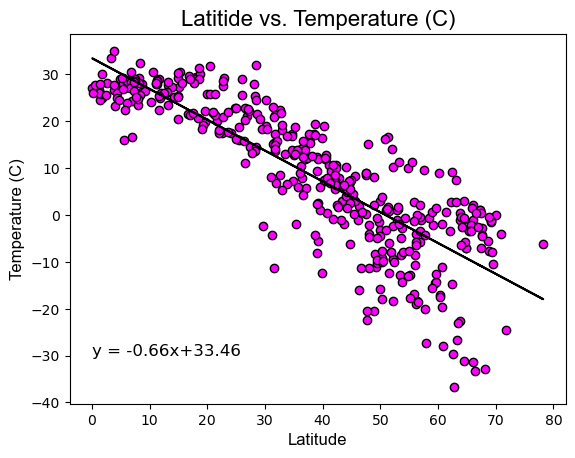

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Plot Northern Hemisphere temperatures
linear_reg(x_values, y_values, "Temperature (C)", (0,-30))

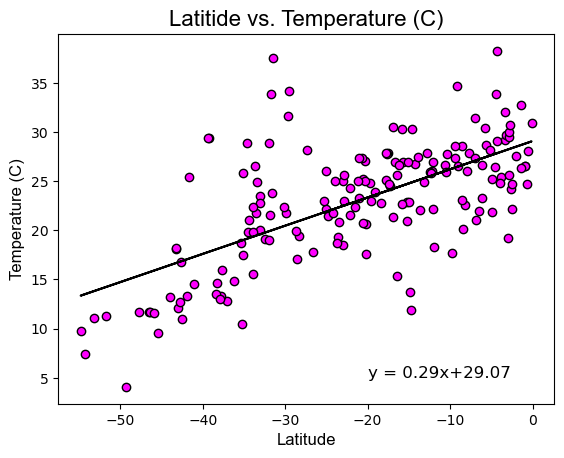

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Plot Southern Hemisphere temperatures
linear_reg(x_values, y_values, "Temperature (C)", (-20,5))

**Discussion about the linear relationship:** Between the two Hemispheres, the Northern Hemisphere seems to have a stroner correlation in Latitude versus temprature. This means that the farther north you go from the Equator, the lower the temprature will be. However, there is definite bias in this data set to the Northern Hemisphere. This will be present throughout the rest of the regression plots. The sample size of the Northern hemisphere versus the Southern hemisphere is 417 vs. 164, respectivly.

### Humidity vs. Latitude Linear Regression Plot

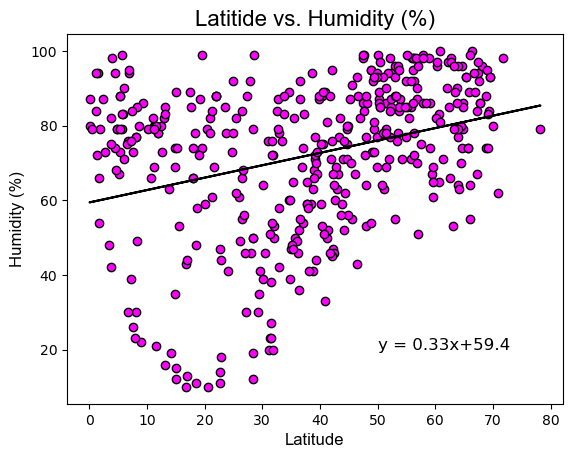

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Plot Northern Hemisphere temperatures
linear_reg(x_values, y_values, "Humidity (%)", (50,20))

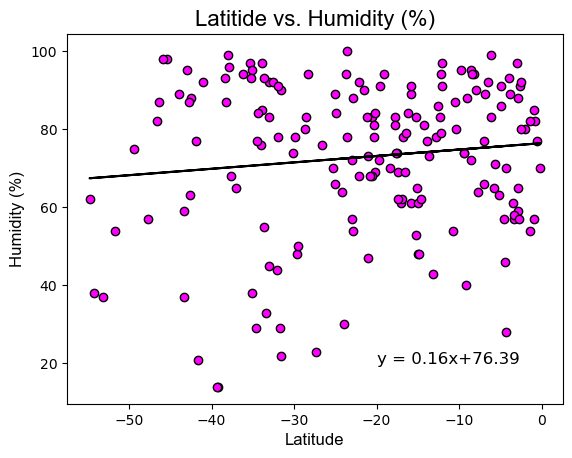

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Plot Southern Hemisphere temperatures
linear_reg(x_values, y_values, "Humidity (%)", (-20,20))

**Discussion about the linear relationship:** Data bias is present here yet again due to the data set. However, there is not as strong of a correlation with the humidity in the Southern Hemisphere as there is in the Northern Hemisphere, but that is due to the sample sizes. [WRITE MORE].


### Cloudiness vs. Latitude Linear Regression Plot

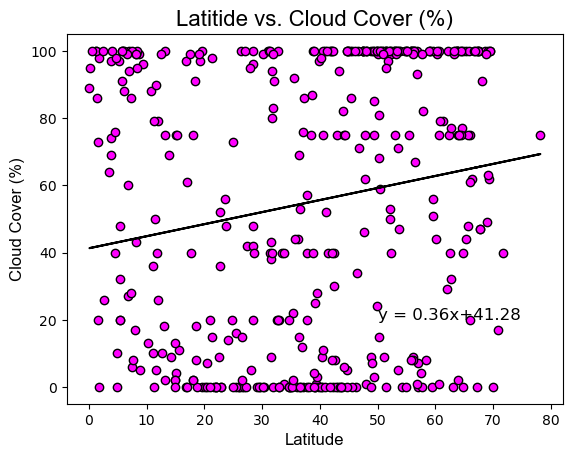

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Plot Northern Hemisphere temperatures
linear_reg(x_values, y_values, "Cloud Cover (%)", (50,20))

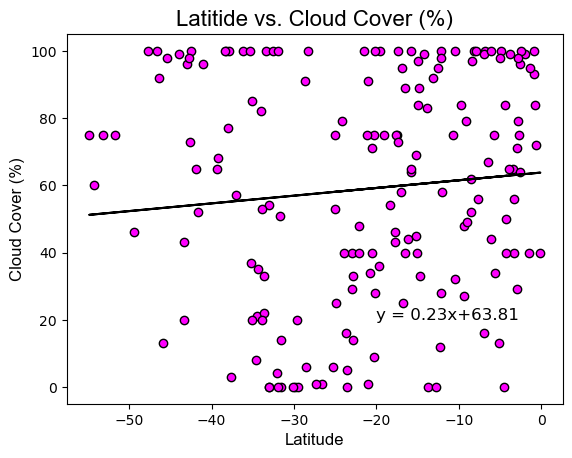

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Plot Southern Hemisphere temperatures
linear_reg(x_values, y_values, "Cloud Cover (%)", (-20,20))

### Wind Speed vs. Latitude Linear Regression Plot

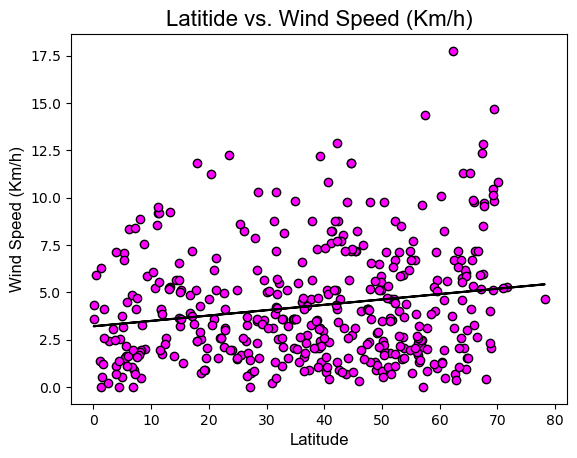

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Plot Northern Hemisphere temperatures
linear_reg(x_values, y_values, "Wind Speed (Km/h)", (50,20))

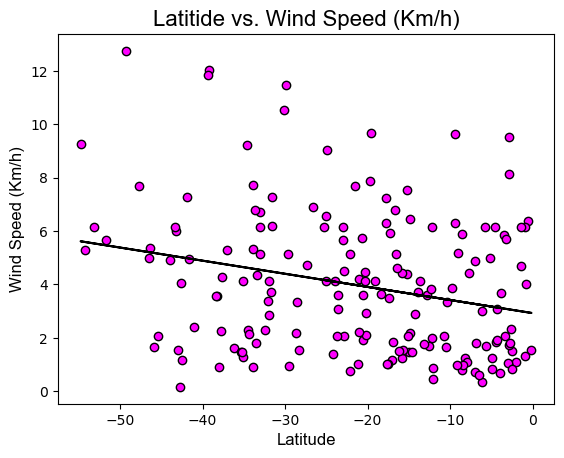

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Plot Southern Hemisphere temperatures
linear_reg(x_values, y_values, "Wind Speed (Km/h)", (-20,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE